<a href="https://colab.research.google.com/github/huijeong728/advanced-statistics/blob/master/HW3_2018220084_%EB%AC%B8%ED%9D%AC%EC%A0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Fashion Mnist 데이터를 잘 적합시키는 CNN 기반 모형찾기

In [1]:
try:
  # Colab only
  %tensorflow_version 2.x
except Exception:
  pass

TensorFlow 2.x selected.


In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals, unicode_literals

# tensorflow와 tf.keras를 임포트합니다
import tensorflow as tf
from tensorflow import keras

# 헬퍼(helper) 라이브러리를 임포트합니다
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0


### **1) Fashion Mnist 데이터셋 임포트하기**

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### **2) 데이터 전처리**

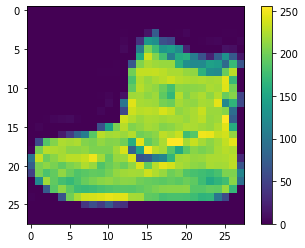

In [5]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [6]:
train_images.shape

(60000, 28, 28)

In [0]:
train_images=train_images.reshape(train_images.shape[0],28,28,1)
test_images=test_images.reshape(test_images.shape[0],28,28,1)

### **3-1) 첫 번째 모델 구성, 훈련, 정확도 평가**

#### (1) 층 구성

In [0]:
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras import Sequential

In [9]:
model1=Sequential()
model1.add( Conv2D(input_shape=(28, 28, 1),
                  filters=32,kernel_size=(3, 3),strides=(1 ,1),
                  padding='same',activation='relu'))
model1.add(Flatten())
model1.add(Dense(128,activation ='relu'))
model1.add(Dense(10, activation ='softmax'))
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               3211392   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 3,213,002
Trainable params: 3,213,002
Non-trainable params: 0
_________________________________________________________________


#### (2) 모델 컴파일

In [0]:
model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#### (3) 모델 훈련

In [11]:
model1.fit(train_images, train_labels, epochs=5, batch_size=1000)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 96us/sample - loss: 74.0889 - accuracy: 0.6503
Epoch 2/5
60000/60000 [==============================] - 2s 30us/sample - loss: 1.8024 - accuracy: 0.8348
Epoch 3/5
60000/60000 [==============================] - 2s 30us/sample - loss: 0.7985 - accuracy: 0.8639
Epoch 4/5
60000/60000 [==============================] - 2s 29us/sample - loss: 0.5306 - accuracy: 0.8779
Epoch 5/5
60000/60000 [==============================] - 2s 30us/sample - loss: 0.4183 - accuracy: 0.8905


#### 4) 정확도 평가

In [12]:
test1_loss, test1_acc = model1.evaluate(test_images,  test_labels, verbose=2)

print('\n테스트 정확도:', test1_acc)

10000/1 - 1s - loss: 0.5814 - accuracy: 0.8751

테스트 정확도: 0.8751


### **3-2) 두 번째 모델 구성, 훈련, 정확도 평가**

#### (1) 층 구성

In [0]:
from tensorflow.keras.layers import Dense, Flatten, Conv2D, AveragePooling2D

In [14]:
model2= Sequential()
model2.add(Conv2D( 6, kernel_size =(5, 5), strides=( 1, 1), activation= 'tanh',
                 input_shape =(28 ,28, 1) ,padding='same'))
model2.add(AveragePooling2D(pool_size=2, padding='valid')) 
model2.add(Conv2D( 16, kernel_size =(5, 5), strides=( 1, 1), activation= 'tanh',
                padding='valid'))
model2.add(AveragePooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
model2.add(Conv2D( 120, kernel_size =(5, 5), strides=( 1, 1), activation= 'tanh',
                padding='valid'))
model2.add(Flatten())
model2.add(Dense(84,activation ='tanh'))
model2.add(Dense(10, activation ='softmax'))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 1, 1, 120)         48120     
_________________________________________________________________
flatten_1 (Flatten)          (None, 120)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 84)               

#### (2) 모델 컴파일

In [0]:
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#### (3) 모델 훈련

In [16]:
model2.fit(train_images, train_labels, epochs=5, batch_size=1000)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 2s 30us/sample - loss: 0.8035 - accuracy: 0.7270
Epoch 2/5
60000/60000 [==============================] - 1s 16us/sample - loss: 0.4354 - accuracy: 0.8450
Epoch 3/5
60000/60000 [==============================] - 1s 16us/sample - loss: 0.3734 - accuracy: 0.8674
Epoch 4/5
60000/60000 [==============================] - 1s 17us/sample - loss: 0.3421 - accuracy: 0.8777
Epoch 5/5
60000/60000 [==============================] - 1s 17us/sample - loss: 0.3205 - accuracy: 0.8855


#### 4) 정확도 평가

In [17]:
test2_loss, test2_acc = model2.evaluate(test_images,  test_labels, verbose=2)

print('\n테스트 정확도:', test2_acc)

10000/1 - 1s - loss: 0.2603 - accuracy: 0.8716

테스트 정확도: 0.8716


### **3-3) 세 번째 모델 구성, 훈련, 정확도 평가**

#### (1) 층 구성

In [0]:
from tensorflow.keras.layers import Dense, Flatten, Conv2D, AveragePooling2D

In [19]:
model3= Sequential()
model3.add(Conv2D( 6, kernel_size =(5, 5), strides=( 1, 1), activation= 'tanh',
                 input_shape =(28 ,28, 1) ,padding='same'))
model3.add(AveragePooling2D(pool_size=2, padding='valid')) 
model3.add(Conv2D( 50, kernel_size =(5, 5), strides=( 1, 1), activation= 'tanh',
                padding='valid'))
model3.add(AveragePooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
model3.add(Conv2D( 120, kernel_size =(5, 5), strides=( 1, 1), activation= 'tanh',
                padding='valid'))
model3.add(Flatten())
model3.add(Dense(84,activation ='tanh'))
model3.add(Dense(10, activation ='softmax'))
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_2 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 10, 10, 50)        7550      
_________________________________________________________________
average_pooling2d_3 (Average (None, 5, 5, 50)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 1, 1, 120)         150120    
_________________________________________________________________
flatten_2 (Flatten)          (None, 120)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 84)               

#### (2) 모델 컴파일

In [0]:
model3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#### (3) 모델 훈련

In [21]:
model3.fit(train_images, train_labels, epochs=5, batch_size=1000)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 2s 39us/sample - loss: 0.7435 - accuracy: 0.7435
Epoch 2/5
60000/60000 [==============================] - 2s 27us/sample - loss: 0.4199 - accuracy: 0.8503
Epoch 3/5
60000/60000 [==============================] - 2s 27us/sample - loss: 0.3641 - accuracy: 0.8688
Epoch 4/5
60000/60000 [==============================] - 2s 27us/sample - loss: 0.3244 - accuracy: 0.8835
Epoch 5/5
60000/60000 [==============================] - 2s 27us/sample - loss: 0.3034 - accuracy: 0.8910


#### 4) 정확도 평가

In [22]:
test3_loss, test3_acc = model3.evaluate(test_images,  test_labels, verbose=2)

print('\n테스트 정확도:', test3_acc)

10000/1 - 1s - loss: 0.3314 - accuracy: 0.8825

테스트 정확도: 0.8825


### **3-4) 네 번째 모델 구성, 훈련, 정확도 평가**

#### (1) 층 구성

In [0]:
from tensorflow.keras.layers import Dense, Flatten, Conv2D, AveragePooling2D

In [24]:
model4= Sequential()
model4.add(Conv2D( 6, kernel_size =(5, 5), strides=( 1, 1), activation= 'tanh',input_shape =(28 ,28, 1) ,padding='same'))
model4.add(AveragePooling2D(pool_size=2, padding='valid')) 
model4.add(Conv2D( 50, kernel_size =(5, 5), strides=( 1, 1), activation= 'tanh',padding='valid'))
model4.add(MaxPool2D(pool_size=(2,2)))
model4.add(Conv2D( 120, kernel_size =(5, 5), strides=( 1, 1), activation= 'tanh', padding='valid'))
model4.add(Flatten())
model4.add(Dense(84,activation ='tanh'))
model4.add(Dense(10, activation ='softmax'))
model4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_4 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 10, 10, 50)        7550      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 5, 5, 50)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 1, 1, 120)         150120    
_________________________________________________________________
flatten_3 (Flatten)          (None, 120)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 84)               

#### (2) 모델 컴파일

In [0]:
model4.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#### (3) 모델 훈련

In [26]:
model4.fit(train_images, train_labels, epochs=5, batch_size=1000)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 2s 38us/sample - loss: 0.7426 - accuracy: 0.7399
Epoch 2/5
60000/60000 [==============================] - 2s 27us/sample - loss: 0.3953 - accuracy: 0.8584
Epoch 3/5
60000/60000 [==============================] - 2s 28us/sample - loss: 0.3318 - accuracy: 0.8812
Epoch 4/5
60000/60000 [==============================] - 2s 28us/sample - loss: 0.3027 - accuracy: 0.8905
Epoch 5/5
60000/60000 [==============================] - 2s 28us/sample - loss: 0.2810 - accuracy: 0.8975


#### 4) 정확도 평가

In [27]:
test4_loss, test4_acc = model4.evaluate(test_images,  test_labels, verbose=2)

print('\n테스트 정확도:', test4_acc)

10000/1 - 1s - loss: 0.3046 - accuracy: 0.8836

테스트 정확도: 0.8836


### **3-5) 다섯 번째 모델 구성, 훈련, 정확도 평가**

#### (1) 층 구성

In [0]:
from tensorflow.keras.layers import Dense, Flatten, Conv2D, AveragePooling2D

In [29]:
model5= Sequential()
model5.add(Conv2D( 6, kernel_size =(3, 3), strides=( 1, 1), activation= 'tanh',
                 input_shape =(28 ,28, 1) ,padding='same'))
model5.add(AveragePooling2D(pool_size=2, padding='valid')) 
model5.add(Conv2D( 36, kernel_size =(3, 3), strides=( 1, 1), activation= 'tanh',
                padding='valid'))
model5.add(AveragePooling2D(pool_size=(2,2), strides=(1,1), padding='valid'))
model5.add(Conv2D( 72, kernel_size =(3, 3), strides=( 1, 1), activation= 'tanh',
                padding='valid'))
model5.add(MaxPool2D(pool_size=(2,2)))
model5.add(Conv2D( 120, kernel_size =(3, 3), strides=( 1, 1), activation= 'tanh',
                padding='valid'))
model5.add(Flatten())
model5.add(Dense(84,activation ='tanh'))
model5.add(Dense(10, activation ='softmax'))
model5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 28, 28, 6)         60        
_________________________________________________________________
average_pooling2d_5 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 12, 12, 36)        1980      
_________________________________________________________________
average_pooling2d_6 (Average (None, 11, 11, 36)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 9, 9, 72)          23400     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 72)          0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 2, 2, 120)        

#### (2) 모델 컴파일

In [0]:
model5.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#### (3) 모델 훈련

In [31]:
model5.fit(train_images, train_labels, epochs=5, batch_size=1000)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 55us/sample - loss: 0.8368 - accuracy: 0.7016
Epoch 2/5
60000/60000 [==============================] - 2s 40us/sample - loss: 0.4918 - accuracy: 0.8172
Epoch 3/5
60000/60000 [==============================] - 2s 40us/sample - loss: 0.4082 - accuracy: 0.8511
Epoch 4/5
60000/60000 [==============================] - 2s 41us/sample - loss: 0.3594 - accuracy: 0.8696
Epoch 5/5
60000/60000 [==============================] - 2s 40us/sample - loss: 0.3253 - accuracy: 0.8830


#### 4) 정확도 평가

In [32]:
test5_loss, test5_acc = model5.evaluate(test_images,  test_labels, verbose=2)

print('\n테스트 정확도:', test5_acc)

10000/1 - 1s - loss: 0.3252 - accuracy: 0.8780

테스트 정확도: 0.878


### **4) 결론**

In [33]:
print('\n 첫 번째 모델에서의 테스트 정확도:', test1_acc ,
      '\n 두 번째 모델에서의 테스트 정확도:', test2_acc ,
      '\n 세 번째 모델에서의 테스트 정확도:', test3_acc , 
      '\n 네 번째 모델에서의 테스트 정확도:', test4_acc ,
      '\n 다섯 번째 모델에서의 테스트 정확도:', test5_acc )


 첫 번째 모델에서의 테스트 정확도: 0.8751 
 두 번째 모델에서의 테스트 정확도: 0.8716 
 세 번째 모델에서의 테스트 정확도: 0.8825 
 네 번째 모델에서의 테스트 정확도: 0.8836 
 다섯 번째 모델에서의 테스트 정확도: 0.878


> **Fashion Mnist 데이터를 가장 잘 적합시키는 CNN 기반 모형은 네 번째 모델입니다.**

In [47]:
model4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_4 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 10, 10, 50)        7550      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 5, 5, 50)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 1, 1, 120)         150120    
_________________________________________________________________
flatten_3 (Flatten)          (None, 120)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 84)               

# 2. Mnist 데이터를 잘 적합시키는 CNN 기반 모형 찾기

In [35]:
from __future__ import absolute_import, division, print_function, unicode_literals

!pip install tensorflow-gpu==2.0.0-rc1
import tensorflow as tf

     |████████████████████████████████| 380.5MB 44kB/s 
     |████████████████████████████████| 501kB 45.3MB/s 
     |████████████████████████████████| 4.3MB 33.0MB/s 
  Found existing installation: tensorflow-gpu 2.0.0
    Uninstalling tensorflow-gpu-2.0.0:
      Successfully uninstalled tensorflow-gpu-2.0.0


In [36]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0


11493376/11490434 [==============================] - 0s 0us/step


In [37]:
x_train.shape

(60000, 28, 28)

In [0]:

x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)

## **2-1) 첫 번째 모델 구성, 훈련, 정확도 평가**

In [0]:
model21 = tf.keras.models.Sequential([
                                      tf.keras.layers.Conv2D(filters=32,kernel_size=(3, 3),strides=(1 ,1),padding='same',activation='relu'),      
                                      tf.keras.layers.MaxPooling2D(pool_size = (2,2)),                              
                                      tf.keras.layers.Flatten(),
                                      tf.keras.layers.Dense(128, activation='relu'),
                                      tf.keras.layers.Dropout(0.2),
                                      tf.keras.layers.Dense(10, activation='softmax')
                                      ])

model21.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [40]:
 model21.fit(x_train, y_train, epochs=5)
 
 test21_loss, test21_acc = model21.evaluate(x_test,  y_test, verbose=2)

print('\n테스트 정확도:', test21_acc)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 10s 163us/sample - loss: 0.1766 - accuracy: 0.9465
Epoch 2/5
60000/60000 [==============================] - 9s 150us/sample - loss: 0.0649 - accuracy: 0.9802
Epoch 3/5
60000/60000 [==============================] - 9s 151us/sample - loss: 0.0444 - accuracy: 0.9860
Epoch 4/5
60000/60000 [==============================] - 9s 150us/sample - loss: 0.0342 - accuracy: 0.9893
Epoch 5/5
60000/60000 [==============================] - 9s 151us/sample - loss: 0.0244 - accuracy: 0.9919
10000/1 - 1s - loss: 0.0208 - accuracy: 0.9868

테스트 정확도: 0.9868


## **2-2) 두 번째 모델 구성, 훈련, 정확도 평가**

In [0]:
model22 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=32,kernel_size=(3, 3),strides=(1 ,1), padding='same',activation='relu'),      
  tf.keras.layers.MaxPooling2D(pool_size = (2,2)),  
  tf.keras.layers.Conv2D(filters=64,kernel_size=(3, 3),strides=(1 ,1), padding='valid',activation='relu'),      
  tf.keras.layers.MaxPooling2D(pool_size = (2,2)),                              
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model22.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [42]:
model22.fit(x_train, y_train, epochs=5) 

test22_loss, test22_acc = model22.evaluate(x_test,  y_test, verbose=2)

print('\n테스트 정확도:', test22_acc)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 11s 188us/sample - loss: 0.1450 - accuracy: 0.9553
Epoch 2/5
60000/60000 [==============================] - 11s 179us/sample - loss: 0.0491 - accuracy: 0.9851
Epoch 3/5
60000/60000 [==============================] - 11s 179us/sample - loss: 0.0336 - accuracy: 0.9894
Epoch 4/5
60000/60000 [==============================] - 11s 188us/sample - loss: 0.0255 - accuracy: 0.9916
Epoch 5/5
60000/60000 [==============================] - 11s 184us/sample - loss: 0.0207 - accuracy: 0.9931
10000/1 - 1s - loss: 0.0115 - accuracy: 0.9923

테스트 정확도: 0.9923


## **2-3) 세 번째 모델 구성, 훈련, 정확도 평가**

In [0]:
model23 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=32,kernel_size=(3, 3),strides=(1 ,1),  padding='same',activation='relu'),      
  tf.keras.layers.MaxPooling2D(pool_size = (2,2)),  
  tf.keras.layers.Conv2D(filters=64,kernel_size=(3, 3),strides=(1 ,1), padding='valid',activation='relu'),      
  tf.keras.layers.MaxPooling2D(pool_size = (2,2)),              
  tf.keras.layers.Conv2D(filters=64,kernel_size=(3, 3),strides=(1 ,1), padding='valid',activation='relu'),      
  tf.keras.layers.AveragePooling2D(pool_size=2, padding='valid'),             
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model23.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [44]:
model23.fit(x_train, y_train, epochs=5) 

test23_loss, test23_acc = model23.evaluate(x_test,  y_test, verbose=2)

print('\n테스트 정확도:', test23_acc)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 13s 209us/sample - loss: 0.1923 - accuracy: 0.9380
Epoch 2/5
60000/60000 [==============================] - 12s 197us/sample - loss: 0.0548 - accuracy: 0.9836
Epoch 3/5
60000/60000 [==============================] - 12s 196us/sample - loss: 0.0409 - accuracy: 0.9873
Epoch 4/5
60000/60000 [==============================] - 12s 196us/sample - loss: 0.0325 - accuracy: 0.9904
Epoch 5/5
60000/60000 [==============================] - 12s 198us/sample - loss: 0.0258 - accuracy: 0.9918
10000/1 - 1s - loss: 0.0157 - accuracy: 0.9894

테스트 정확도: 0.9894


### **3) 결론**

In [45]:
print('\n 첫 번째 모델에서의 테스트 정확도:', test21_acc ,
      '\n 두 번째 모델에서의 테스트 정확도:', test22_acc ,
      '\n 세 번째 모델에서의 테스트 정확도:', test23_acc  )


 첫 번째 모델에서의 테스트 정확도: 0.9868 
 두 번째 모델에서의 테스트 정확도: 0.9923 
 세 번째 모델에서의 테스트 정확도: 0.9894


> **Mnist 데이터를 가장 잘 적합시키는 CNN 기반 모형은 두 번째 모델입니다.**

In [48]:
model22.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           multiple                  320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 multiple                  0         
_________________________________________________________________
conv2d_16 (Conv2D)           multiple                  18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 multiple                  0         
_________________________________________________________________
flatten_6 (Flatten)          multiple                  0         
_________________________________________________________________
dense_12 (Dense)             multiple                  295040    
_________________________________________________________________
dropout_1 (Dropout)          multiple                 